In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

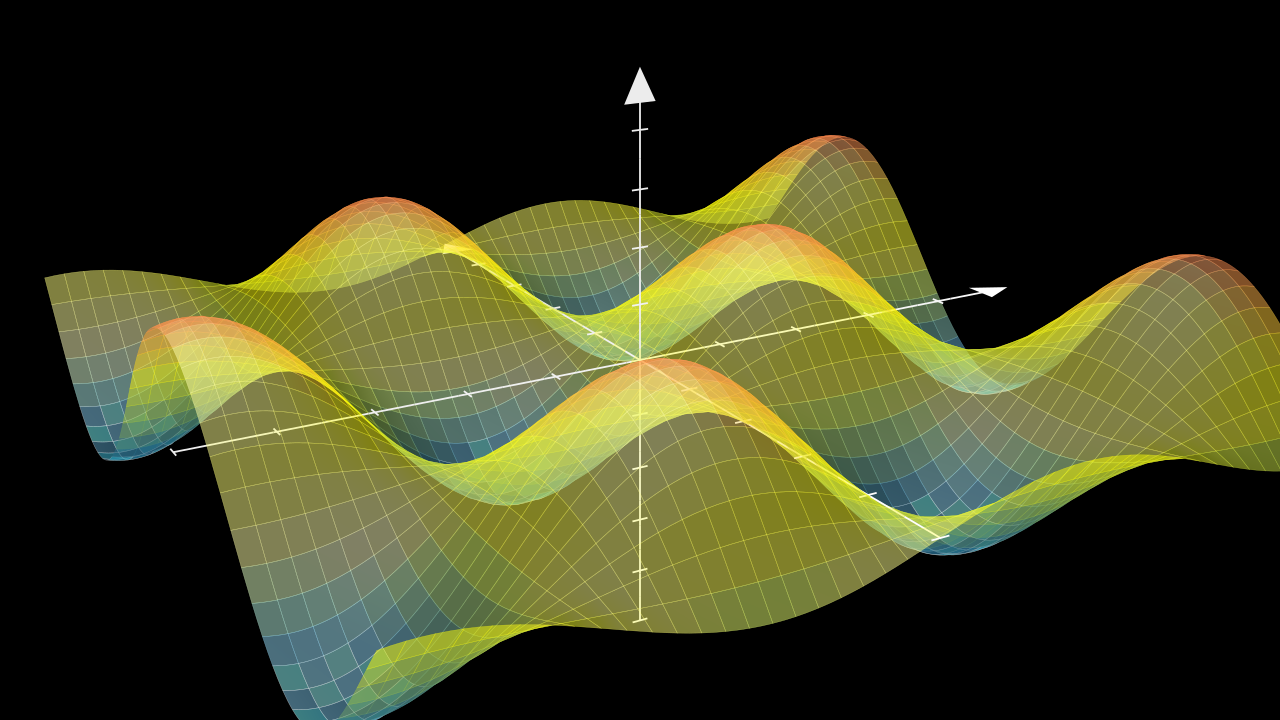

In [3]:
%%manim -qm -v WARNING Ex1
from common.utils.color_utils import interpolate_color_range

class Ex1(ThreeDScene):
    def setup(self):
        pass

    def construct(self):

        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)



        axes = ThreeDAxes(x_range=(-5, 5, 1), y_range=(-5, 5, 1), z_range=(-5, 5, 1))

        surface = Surface(

            lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),

            resolution=(45, 45),

            v_range=[-5, 5],

            u_range=[-5, 5],

        )

        surface.fade(0.5)
        colors = [DARK_BLUE, YELLOW, RED]
        partical = surface.submobjects
        for i in partical:
            y = i.get_top()[2]
            i.set_color(interpolate_color_range(*colors, (y+1)/2.5))
        self.add(axes,surface)

In [4]:
%%manim -qm -v WARNING Ex2
from common.utils.color_utils import interpolate_color_range

resolution = 42
class Ex2(ThreeDScene):
    def setup(self):
        self.set_camera_orientation(phi = 0.4*PI, theta = 1.3*PI)
        self.three_d_axes = ThreeDAxes(x_range=(-5, 5, 1), y_range=(-5, 5, 1), z_range=(-5, 5, 1))
        self.surface = Surface(
            lambda u,v: self.three_d_axes.c2p(u,v,0),
            u_range=[-5,5],
            v_range=[-5,5],
            resolution=(resolution,resolution),
            stroke_color=YELLOW,
            checkerboard_colors=[YELLOW]
        )
        self.add(self.three_d_axes)
        
    def construct(self):
        self.play(LaggedStart(*[DrawBorderThenFill(i) for i in self.surface], lag_ratio=0.005, run_time=5))
        
        surface = Surface(
            lambda u, v: self.three_d_axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=(resolution, resolution),
            v_range=[-5, 5],
            u_range=[-5, 5],
        )
        surface.fade(0.5)
        colors = [DARK_BLUE, YELLOW, RED]
        partical = surface.submobjects
        for i in partical:
            y = i.get_top()[2]
            i.set_color(interpolate_color_range(*colors, (y+1)/2.5))
        
        self.wait()
        self.play(Transform (self.surface, surface), run_time=5)
        self.wait()
        

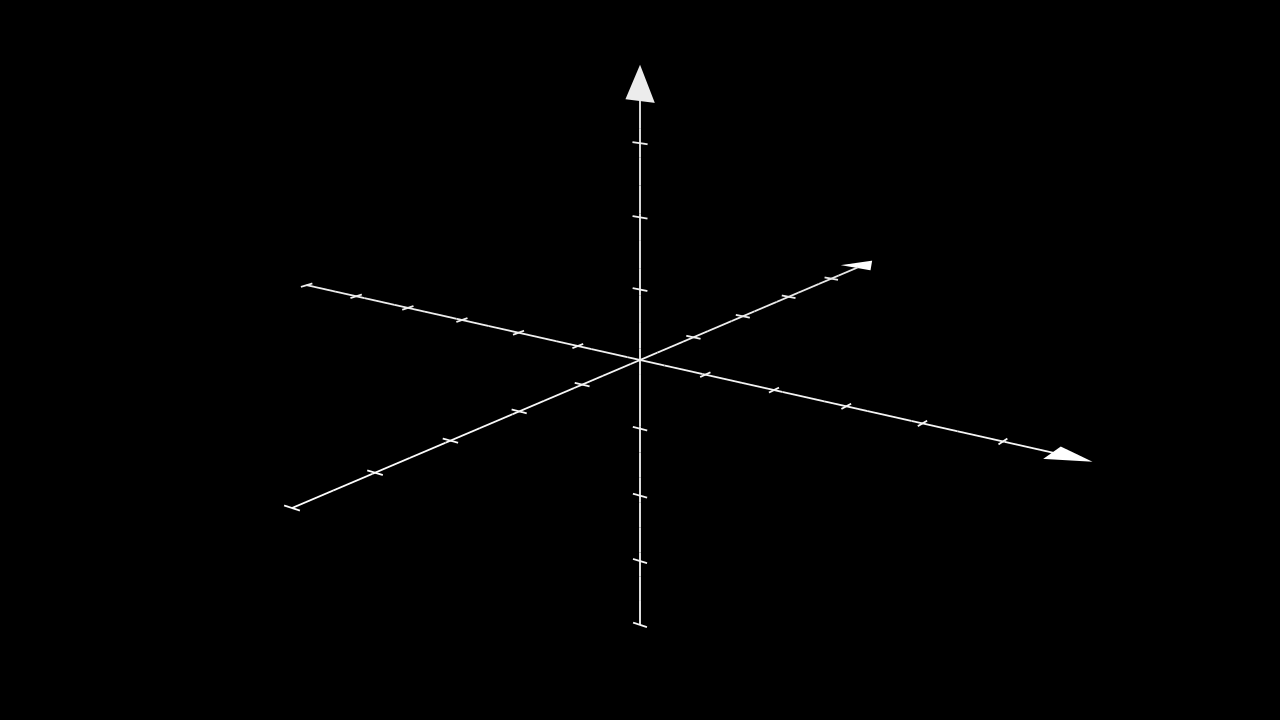

In [5]:
%%manim -qm -v WARNING TestThreeD

class TestThreeD(ThreeDScene):
    def setup(self):
        self.set_camera_orientation(phi = 0.4*PI, theta=1.7*PI, gamma=0*PI)
        three_d = ThreeDAxes()
        self.add(three_d)

In [6]:
%%manim -qm -v WARNING Example

class Example(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes()
        func = axes_3d.plot_parametric_curve(
            lambda t: np.array([
                2*np.cos(t),
                3*np.sin(t),
                t/3
            ]),
            t_range=(-2*PI,2*PI,0.01),
            color=RED
        )

        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)
        self.add(
            axes_3d,
            func
        )
        self.wait(0.5)
        self.move_camera(theta=120*DEGREES,run_time=6,rate_func=linear)
        self.wait(0.5)
        self.move_camera(theta=90*DEGREES,phi=0,run_time=2,rate_func=smooth)
        self.wait(0.5)

In [7]:
%%manim -qm -v WARNING Example

class Example(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            x_range=(-6,6,1),
            x_length=12,
            y_range=(-5,5,1),
            y_length=10,
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)

        surface = Surface(
            lambda u, v: np.array([
                np.cos(TAU * v),
                np.sin(TAU * v),
                2 * (1 - u)
            ]),
        ).fade(0.5)

        paraboloid = Surface(
            lambda u, v: np.array([
                np.cos(v)*u,
                np.sin(v)*u,
                u**2
            ]),
            v_range=(0,TAU),
        ).fade(0.5)

        para_hyp = Surface(
            lambda u, v: np.array([
                u,
                v,
                u**2-v**2
            ]),
            u_range=(-2,2),
            v_range=(-2,2),
        ).fade(0.5)

        cone = Surface(
            lambda u, v: np.array([
                u*np.cos(v),
                u*np.sin(v),
                u
            ]),
            u_range=(-2,2),
            v_range=(0,TAU),
        )
        sphere = Surface(
            lambda u, v: np.array([
                1.5*np.cos(u)*np.cos(v),
                1.5*np.cos(u)*np.sin(v),
                1.5*np.sin(u)
            ]),
            #Resolution of the surfaces
            u_range=(-PI/2,PI/2),
            v_range=(0,TAU),
        )

        self.add(
            axes_3d,surface
        )
        self.play(
            Transform(surface, paraboloid)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, para_hyp)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, cone)
        )
        self.wait(0.5)
        self.play(
            Transform(surface, sphere)
        )
        self.wait(0.5)

In [8]:
%%manim -qm --fps=15 --disable_caching -v WARNING Example

class Example(ThreeDScene):
    def construct(self):
        axes_3d = ThreeDAxes(
            # unit_size=1 in Z axis
            z_range=(-3,3,1),
            z_length=6,
        )
        self.set_camera_orientation(phi=70*DEGREES,theta=240*DEGREES)
        # Arrows3Ds are surfaces, so the more you add, the longer it will take to render.
        main_line        = Arrow3D(ORIGIN,axes_3d.c2p(4,3)+2*OUT,color=GREEN,height=0.7,base_radius=0.2)
        vertical_line    = Arrow3D(axes_3d.c2p(4,0),axes_3d.c2p(4,3))
        horizontal_line  = Arrow3D(axes_3d.c2p(0,3),axes_3d.c2p(4,3))
        fall_line        = Arrow3D(axes_3d.c2p(4,3),axes_3d.c2p(4,3)+OUT*2)

        self.add(axes_3d)
        # start camera movement
        self.begin_ambient_camera_rotation(0.15)
        self.wait()
        self.play(FadeIn(main_line))
        self.play(FadeIn(vertical_line),FadeIn(horizontal_line),FadeIn(fall_line))
        self.wait()
        # stop camera movement
        self.stop_ambient_camera_rotation()
        self.wait()

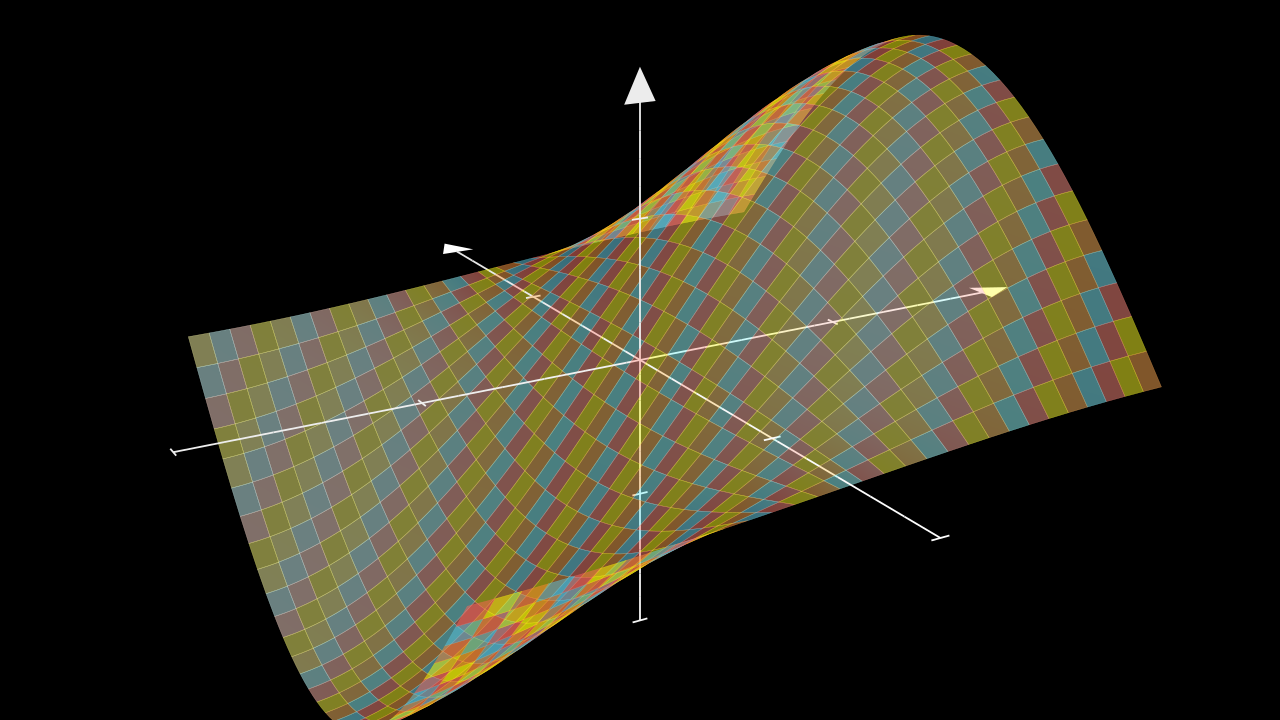

In [8]:
%%manim -qm -v WARNING Example

class Example(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(phi=70*DEGREES,theta=-120*DEGREES)

        axes = ThreeDAxes(x_range=(-2, 2, 1), y_range=(-2, 2, 1), z_range=(-2, 2, 1))

        surface = Surface(
            lambda u, v: axes.c2p(u, v, 2 * np.sin(u) * np.cos(v)),
            resolution=31,
            v_range=[-1.5, 1.5],
            u_range=[-1.5, 1.5],
            checkerboard_colors = [RED,BLUE,ORANGE,YELLOW]
        )
        surface.fade(0.5)
        from itertools import cycle
        colors = cycle([RED,BLUE,ORANGE,YELLOW])
        for s in surface: s.set_color(next(colors))

        self.add(axes,surface)